# Deep Learning Keras

## Imports

In [ ]:
# importando o tensorflow e o keras
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
# Importando o matplotlib para plotar as imagens
import matplotlib.pyplot as plt

import numpy as np

## Carregando o Dataset

In [ ]:
# Acessar dataset disponivel dentro do keras
# O dataset contem 70 mil imagens, portanto 60 mil é de treino e 10 mil é de teste
dataset = keras.datasets.fashion_mnist

In [ ]:
# Carregar o dataset
# Ao carregar o DataSet, o retorno é duas tuplas, onde a primeira contem imagens e identificações de treino (x,y)
# e o segundo contem imagens e identificações de teste (x,y)
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## Exploração dos dados

In [ ]:
# Podemos analisar a dimensão do nosso array com o shape
# Formato do array
# Temos 60000 registro de array de 28 linhas 28 coluna
imagens_treino.shape

In [ ]:
# Temos 10000 registro de array de 28 linhas 28 coluna
# Imagens de treino
imagens_teste.shape

In [ ]:
print('Labels de treino: ', len(identificacoes_treino),'Labels de Teste: ', len(identificacoes_teste))

In [ ]:
# A identificação minima 
identificacoes_treino.min()

In [ ]:
# A identificação maxima
identificacoes_treino.max()

## Exibição dos dados

In [16]:
total_de_classificadores = 10
# Mapear os classificadores de 0 a 9 por nomes
# https://github.com/zalandoresearch/fashion-mnist
nomes_de_classificadores = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 
                            'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

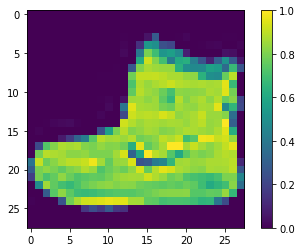

In [17]:
'''
for imagem in range(10):
#     Configurando o sub plot para exibir 2 linha e 5 colunas de imagens
    plt.subplot(2,5,imagem+1)
    # Platando a primeira imagem de index[0]
    plt.imshow(imagens_treino[imagem])
    # Adicionando um titulo a img
    plt.title(nomes_de_classificadores[identificacoes_treino[imagem]])
'''

# Podemos plotar uma barra de cores para identificar a gradação das cores
plt.imshow(imagens_treino[0])
plt.colorbar()

Link para scipy img, lib para manipular imagens
http://scipy-lectures.org/advanced/image_processing/

## Normalizando as imagens

In [18]:
# Camadas do moadelo
# modelo sequencial
#     entrada
#     processamento
#     saida

# NORMALIZAÇÃO DAS IMAGENS
# Dimunindo o processamento de pixels de 255 para 0 a 1. A rede não precisa processar 255 pixels e sim de 0 a 1 
# com suas diferença, ou seja, 0.10, 0.30,1, etc
imagens_treino = imagens_treino / float(255)

## Criando Modelo

In [19]:
# Definindo um modelo sequencial, onde temos a entrada, processamento e saida dos dados
modelo = keras.Sequential([
#   Camanda de entrada
#   Na priemira camada, vamos pegar as imagens de 28x28 e achatar para um unico array de 784(28x28) posições
    keras.layers.Flatten(input_shape = (28,28)),
#   CAMADAS OCULTAS, porque não é possivel saber o que esta acontencendo para realizar o agrupamento 
#   dos neuronios.
#   Camada de processamento
#   Criando 256 camandas "bolinhas" que vão ser densar e comunicar com a camada de Flatten, ou seja
#   a camada com a imagem em um unico array de pixels
#   Alem de termos 256(Recomendado multiplos de 2. Temos que testar o que é melhor para o que queremos)
#   pequenos tensores, temos dizer quando eles vão ser ativados, 
#   que é o relu, uma ativação de redes mais utilizada na comunidade
#   reLU = Unidade linear retificada
#   AS CAMADAS OCULTAS TEM QUE SER TESTADA PARA CHEGAR NA MENOR PERDA(LOSS)
#   A EXECUÇÃO DA COMPILAÇÃO ARMAZENA ALGUMAS VARIAVEIS DE ESTADO DO MODELO E O JUPYTER TAMBEM ARMAZEMA
#   O QUE FAZ COM QUE O MODELO GERE SEMPRE O MESMO RESULTADO, PARA ISSO TEMOS QUE RESTARTAR O NOTEBOOK
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
#     keras.layers.Dense(128, activation=tensorflow.nn.relu),
#     keras.layers.Dense(64, activation=tensorflow.nn.relu),
#   NORMALIZANDO MODELO
#   O dropout mantem 20% das camadas adormecidas para que a rede não fique muito "viciada" com muitas informações
    keras.layers.Dropout(0.2),
#   Camada de Saida
#   O numero da camada de saída é a quantidade de classificações que o modelo vai conter
#   O softmax é uma função que extrai da imagem probabilidades em % de todas outras imagens 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [ ]:
# Quando é realizado o treinamento, os dados de aprendizado passa por um "ciclo" de ida e volta no dentro do 
# modelo, ou seja, entra em 
# flatten -> Dense(neuronios) -> Dropout -> Dense(Softmax) -> flatten(2x) -> Dense(2x)  ...

In [21]:
# Tabela que resume o nosso modelo
# Olhando a tabela abaixo em Shape, podemos analisar que é os mesmo dados que configuramos o modelo, 28*28 = 784
# Param => O param é 
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Compilando modelo

In [20]:
#Compinando o modelo antes de treinar
modelo.compile(
    # Otimizador de treinamento da rede
    optimizer='adam',
    # Perda de informação da rede. Se a rede classificar um item errado, ela vai ter uma perda de informação
    # para calcular a perda, vamos utilizar a "entropia categorica cruzada esparsa" 
    loss='sparse_categorical_crossentropy',
    # Adicionando métricas para identificar o quanto o modelo esta acertando
    metrics=['accuracy'])

## Treinando modelo

In [ ]:
# Treinando um modelo
# epoch é a quantidade de vezes que o modelo vai ser treinado
# validation_split é a quantidade de registro que vamos usar para validar o desempenho, 0.2 = 20%
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

## Salvando e carregando o modelo treinado

In [ ]:
# Salvando e carregando o modelo
modelo.save('modelo_epochs5_nos4.h5')
modelo.save()

modelo_salvo = load_model('modelo_epochs5_nos4.h5')

## Plotando gráfico de acuracia por epoch do treino e teste

In [ ]:
# Salvamos o historico de treinamento do modelo para plotar um grafico com os resultados
# PLOTANDO GRAFICO DE DESEMPENHO DO MODELO
# Plotando dois array de dados
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
# Configurando titulo do grafico
plt.title('Acuracia por epocas')
# label do eixo x
plt.xlabel('epochs')
# label do eixo y
plt.ylabel('accuracy')
# Adicionando legendas
plt.legend(['treino', 'validação'])

## Plotando gráfico de perda por epoch do treino e validação

In [ ]:
# PLOTANDO GRAFICO DE PERDA DO MODELO
# Plotando dois array de dados
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
# Configurando titulo do grafico
plt.title('Perda por epocas')
# label do eixo x
plt.xlabel('epochs')
# label do eixo y
plt.ylabel('loss')
# Adicionando legendas
plt.legend(['treino', 'validação'])

### Exemplo de comunicação das camandas feita pela camada Dense
<img src="./dense.png">

### Exemplo do funcionamento da reLU
<img src="./relu.png">

## Testando o modelo e o modelo salvo

In [ ]:
# Realizando predições no modelo
testes = modelo.predict(imagens_teste)

print('Resultado teste:', np.argmax(testes[1]))
print('numero da imagem de teste:', identificacoes_teste[1])

testes = modelo_salvo.predict(imagens_teste)

print('Resultado teste modelo salvo:', np.argmax(testes[1]))
print('numero da imagem de teste modelo salvo:', identificacoes_teste[1])

## Avalidando o modelo

In [ ]:
# Avaliar o desempenho do modelo
# O evaluate retornaum array com 2 posição onde a primeira é a perda do array e a segunda a acuracia
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acuracia do teste:', acuracia_teste)

In [ ]:
# def export_keras_to_tf(output_model, num_output):
#     print('Loading Keras model: ', 'modelo_epochs5_nos4.h5')

#     keras_model = load_model('modelo_epochs5_nos4.h5')

#     print(keras_model.summary())

#     predictions = [None] * num_output
#     predrediction_node_names = [None] * num_output

#     for i in range(num_output):
#         predrediction_node_names[i] = 'output_node' + str(i)
#         predictions[i] = tf.identity(keras_model.outputs[i], 
#         name=predrediction_node_names[i])

#     sess = K.get_session()

#     constant_graph = graph_util.convert_variables_to_constants(sess, 
#     sess.graph.as_graph_def(), predrediction_node_names)
#     infer_graph = graph_util.remove_training_nodes(constant_graph) 

#     graph_io.write_graph(infer_graph, '.', output_model, as_text=False)